Unique models: ['yolov8m', 'yolov8m_padding']


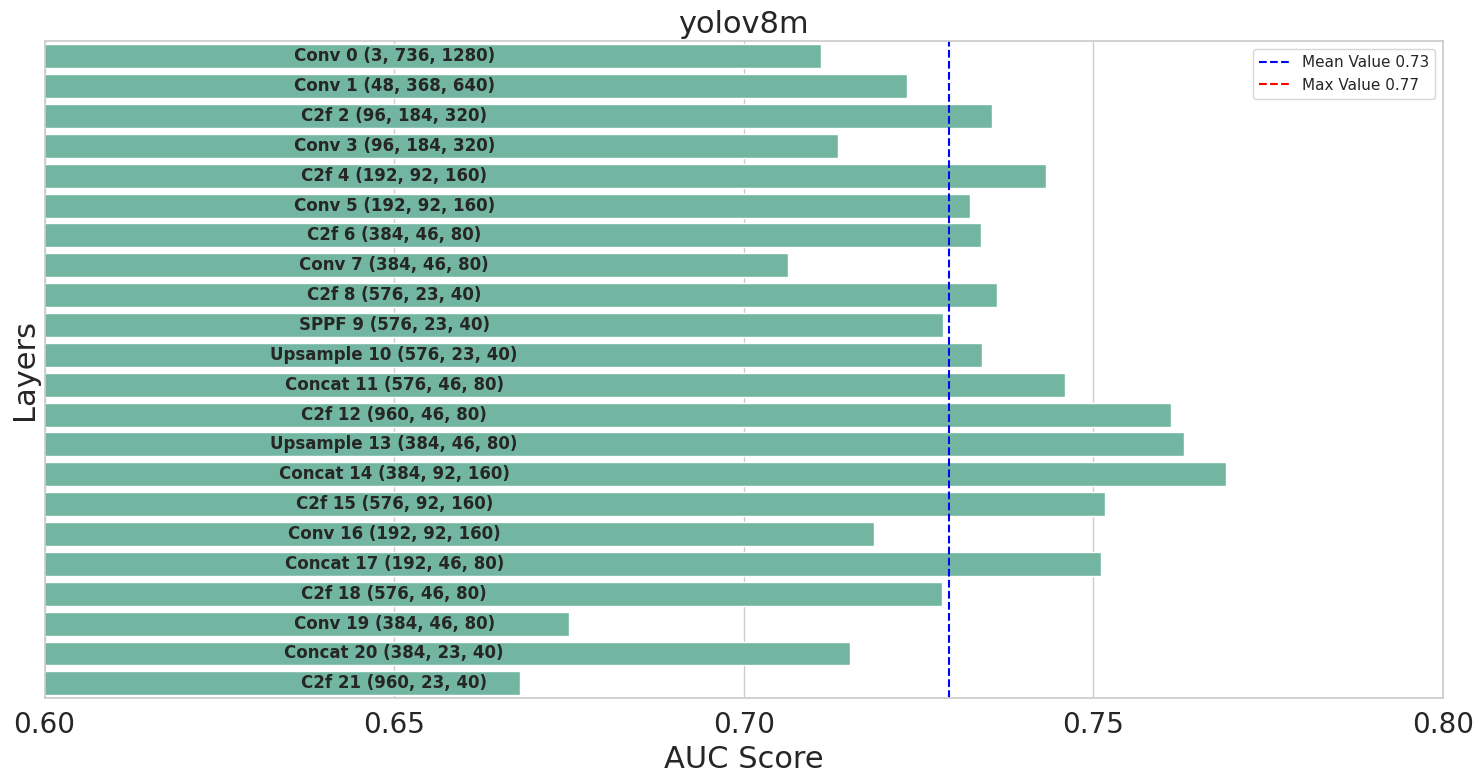

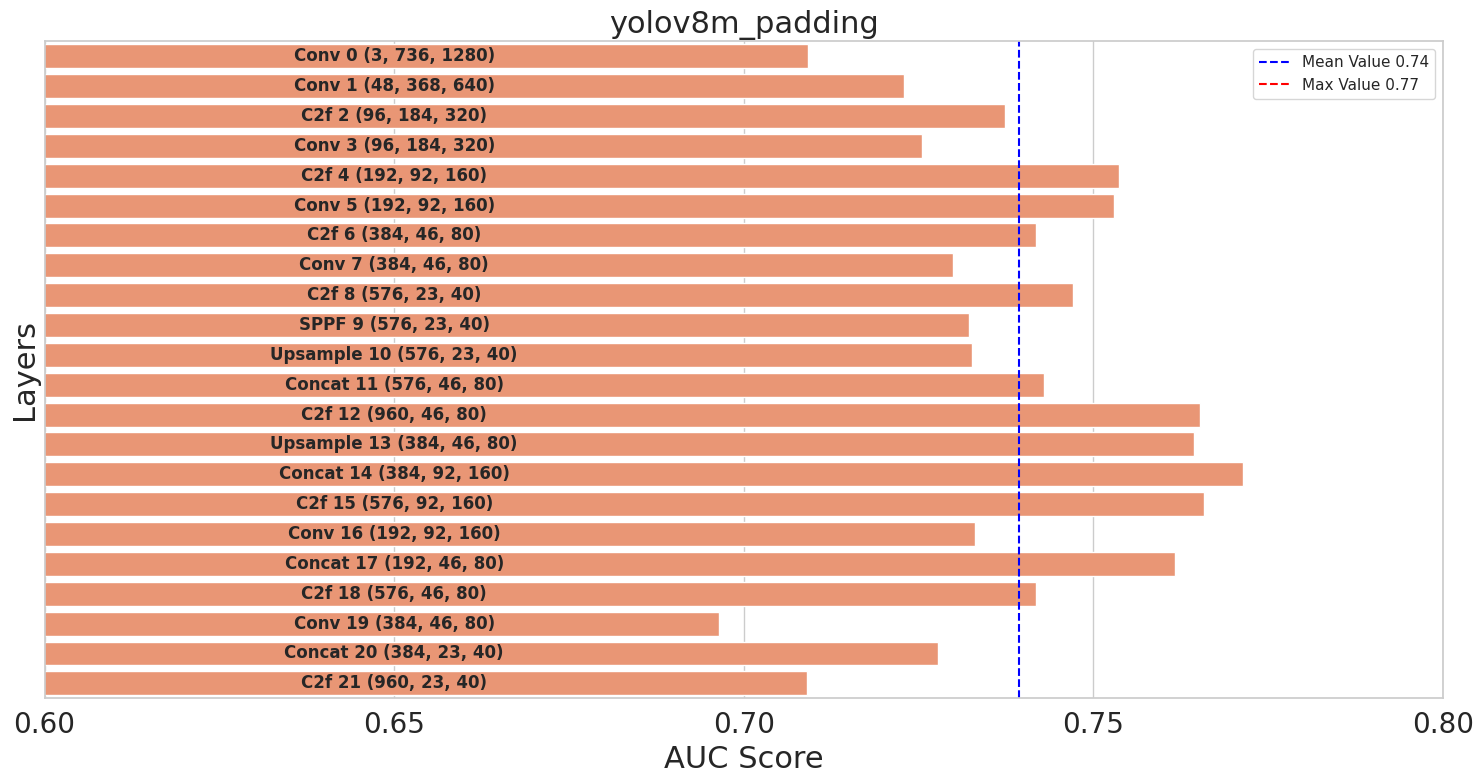

/tmp/ipykernel_193472/1354916357.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_193472/1354916357.py:119: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/tmp/ipykernel_193472/1354916357.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=0)  # Add legend for axlines


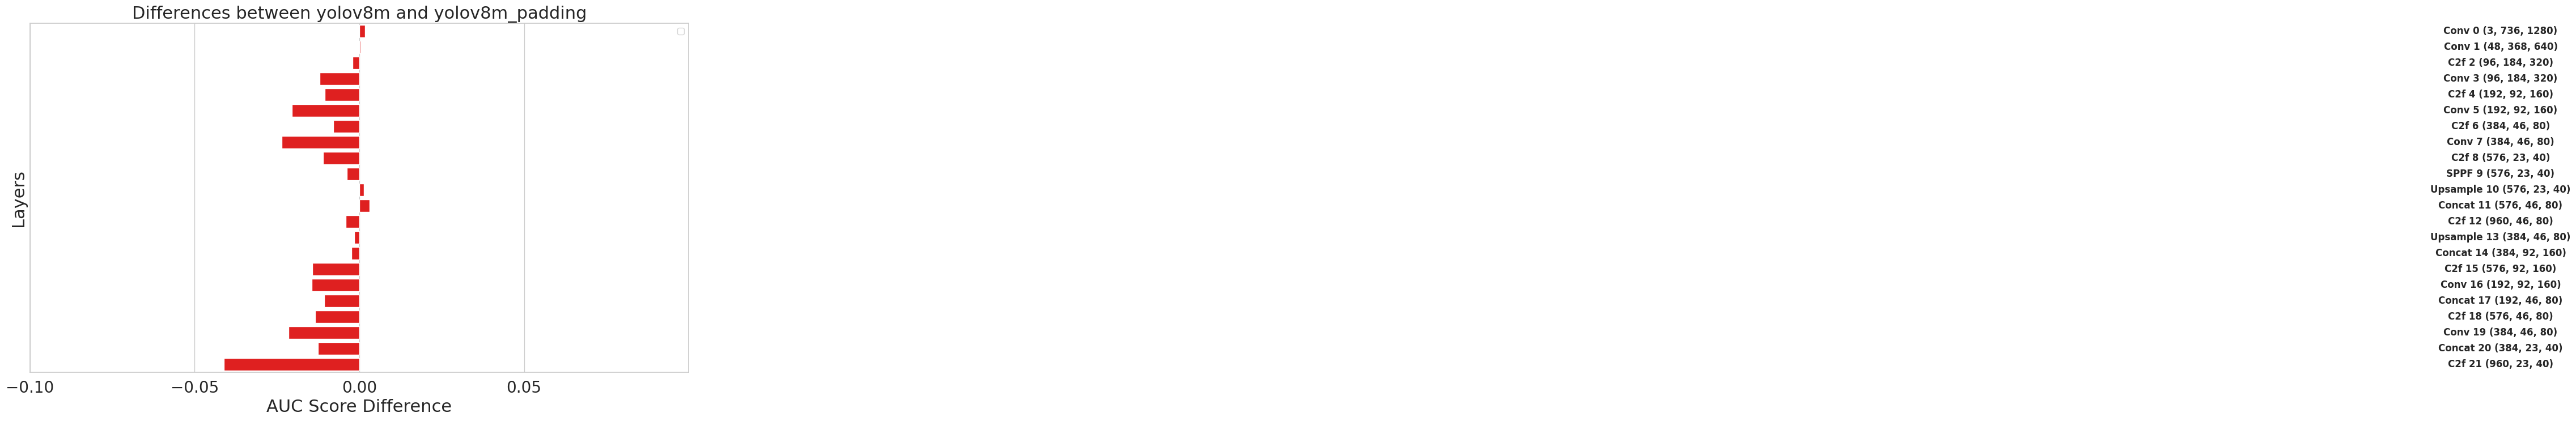

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
data = pd.read_csv('layer_sensitivity.csv')

unique_models = ['yolov8m', 'yolov8m_padding']
print("Unique models:", unique_models)

sns.set(style="whitegrid")

# Define a color palette for the models
colors = sns.color_palette("Set2", len(unique_models))

# Loop through each model and create a horizontal bar chart
for i, model in enumerate(unique_models):
    plt.figure(figsize=(15, 8))
    model_data = data[data['model'] == model]
    
    # Create the horizontal bar plot
    ax = sns.barplot(
        y='layer', 
        x='auc_score', 
        data=model_data, 
        color=colors[i]
    )
    
    mean_value = model_data['auc_score'].mean()
    max_value = model_data['auc_score'].max()

    ax.axvline(mean_value, color='blue', linestyle='--', label=f'Mean Value {round(mean_value, 2)}')
    ax.axvline(0, color='red', linestyle='--', label=f'Max Value {round(max_value, 2)}')

    # Add annotations inside bars
    bars = ax.patches
    for idx, bar in enumerate(bars):
        width = bar.get_width()
        layer_name = model_data.iloc[idx]['layer_name']
        shape_str = model_data.iloc[idx]['shape']
        # Convert string shape to tuple and ignore first dimension
        shape_tuple = eval(shape_str)[1:]
        text = f"{layer_name} {shape_tuple}"
        
        # Put text in the middle of the bar
        ax.text(
            0.65,  # Fixed position at x=0.65 (center of the plot)
            bar.get_y() + bar.get_height() / 2,
            text,
            ha='center',
            va='center',
            fontsize=12,
            fontweight='bold'
        )
    
    plt.title(model, fontsize=22)
    plt.ylabel("")
    plt.xlabel("AUC Score", fontsize=22)
    plt.ylabel("Layers", fontsize=22 )
    plt.xlim(0.6, 0.80) # Set x-axis limits
    plt.tick_params(axis='x', labelsize=20)
    plt.yticks([])  # Remove y-axis ticks
    plt.xticks(np.arange(0.6, 0.80, 0.05))
    # plt.grid(True, axis='x')  # Keep only vertical grid lines
    plt.tight_layout()
    plt.legend(loc=0)  # Add legend for axlines
    plt.savefig(f'{model}_bar_plot.png')
    plt.show()

# Highlight differences between yolov8m and yolov8m_padding
plt.figure(figsize=(15, 8))
yolov8m_data = data[data['model'] == 'yolov8m']
yolov8m_padding_data = data[data['model'] == 'yolov8m_padding']

# Merge data on layer to find differences
merged_data = pd.merge(yolov8m_data, yolov8m_padding_data, on='layer', suffixes=('_yolov8m', '_yolov8m_padding'))
merged_data['difference'] = merged_data['auc_score_yolov8m'] - merged_data['auc_score_yolov8m_padding']

# Create the horizontal bar plot
ax = sns.barplot(
    y='layer', 
    x='difference', 
    data=merged_data, 
    palette=['red' if x != 0 else 'grey' for x in merged_data['difference']]
)

# Add annotations inside bars
bars = ax.patches
for idx, bar in enumerate(bars):
    width = bar.get_width()
    layer_name = merged_data.iloc[idx]['layer_name_yolov8m']
    shape_str = merged_data.iloc[idx]['shape_yolov8m']
    # Convert string shape to tuple and ignore first dimension
    shape_tuple = eval(shape_str)[1:]
    text = f"{layer_name} {shape_tuple}"
    
    # Put text in the middle of the bar
    ax.text(
        0.65,  # Fixed position at x=0.65 (center of the plot)
        bar.get_y() + bar.get_height() / 2,
        text,
        ha='center',
        va='center',
        fontsize=12,
        fontweight='bold'
    )

plt.title('Differences between yolov8m and yolov8m_padding', fontsize=22)
plt.ylabel("")
plt.xlabel("AUC Score Difference", fontsize=22)
plt.ylabel("Layers", fontsize=22 )
plt.xlim(-0.1, 0.1) # Set x-axis limits
plt.tick_params(axis='x', labelsize=20)
plt.yticks([])  # Remove y-axis ticks
plt.xticks(np.arange(-0.1, 0.1, 0.05))
# plt.grid(True, axis='x')  # Keep only vertical grid lines
plt.tight_layout()
plt.legend(loc=0)  # Add legend for axlines
plt.savefig('yolov8m_vs_yolov8m_padding_bar_plot.png')
plt.show()


In [3]:
df=data

In [4]:
def matplotlib_setup(fontsize=45):
    font = {'size'   : fontsize}
    plt.rc('font', **font)
    plt.rcParams["axes.linewidth"]  = 2.5
    plt.grid(linewidth=3,axis='y', color='grey')

    CB91_Blue = '#2CBDFE'
    CB91_Green = '#47DBCD'
    CB91_Pink = '#F3A0F2'
    CB91_Purple = '#9D2EC5'
    CB91_Violet = '#661D98'
    CB91_Amber = '#F5B14C'
    color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
    
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)    
    return plt

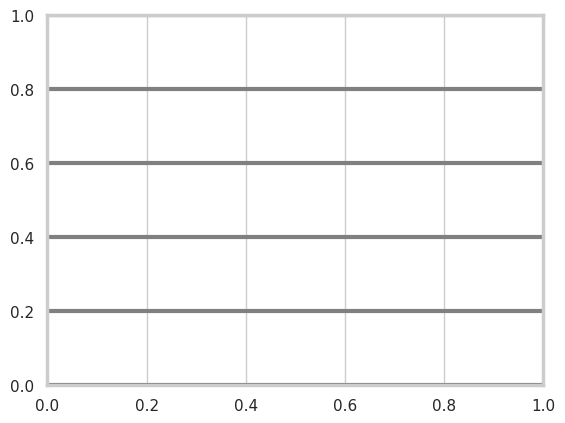

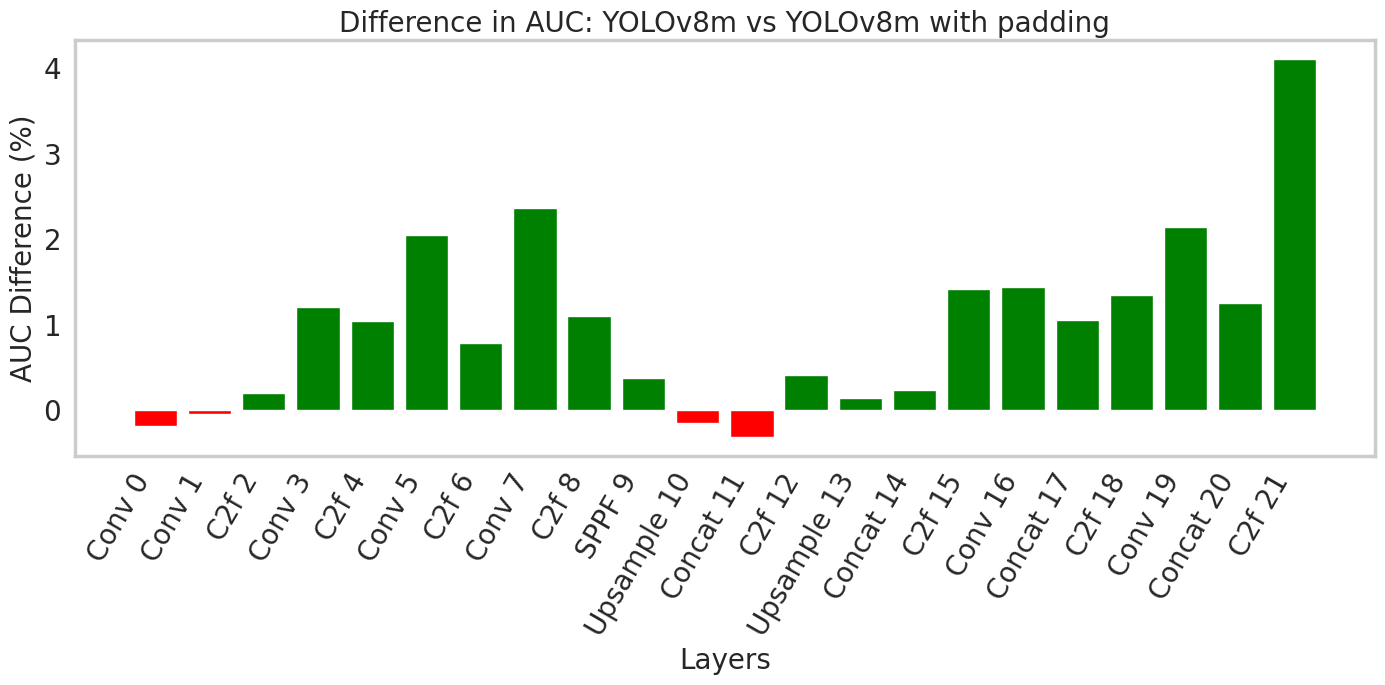

In [21]:
matplotlib_setup()
# Pivot data for comparison
yolov8m = df[df["model"] == "yolov8m"].set_index("layer_name")["auc_score"]
yolov8m_padding = df[df["model"] == "yolov8m_padding"].set_index("layer_name")["auc_score"]

# Compute AUC difference
auc_difference = (yolov8m_padding - yolov8m) * 100

# Plot
plt.figure(figsize=(15, 8))
colors = ['green' if x > 0 else 'red' for x in auc_difference]
plt.bar(auc_difference.index, auc_difference.values, color=colors)
plt.xticks(rotation=60, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("AUC Difference (%)", fontsize=20)
plt.xlabel("Layers", fontsize=20)
plt.title("Difference in AUC: YOLOv8m vs YOLOv8m with padding", fontsize=20)
plt.subplots_adjust(top=0.8)
plt.grid(False)
plt.tight_layout()
plt.savefig('missing_rate_yolov8m.png', dpi=600)
plt.show()

In [9]:
import plotly.graph_objects as go

# Pivot data for comparison
yolov8m = df[df["model"] == "yolov8m"].set_index("layer_name")["auc_score"]
yolov8m_padding = df[df["model"] == "yolov8m_padding"].set_index("layer_name")["auc_score"]

# Compute AUC difference
auc_difference = yolov8m_padding - yolov8m

# Create a bar chart with Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=auc_difference.index,
    y=auc_difference.values,
    marker_color=['green' if x > 0 else 'red' for x in auc_difference],
))

fig.update_layout(
    title="Difference in AUC: YOLOv8m vs YOLOv8m with padding",
    xaxis_title="Layers",
    yaxis_title="AUC Difference (%)",
    xaxis=dict(tickangle=60, tickfont=dict(size=12)),
    yaxis=dict(tickfont=dict(size=15)),
    title_font=dict(size=18),
    plot_bgcolor="white",
    bargap=0.2,
)

fig.show()
